In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [96]:
numero_email=48
df = pd.read_csv(r'dad600.acad3.csv')
df_sample = df.sample(n=100,random_state=numero_email)

In [97]:
ecivil = df_sample["E.Civil"].value_counts()

In [98]:
df_sample["E.Civil"].value_counts()/100

E.Civil
casado        0.52
solteiro      0.27
divorciado    0.13
viuvo         0.08
Name: count, dtype: float64

<BarContainer object of 4 artists>

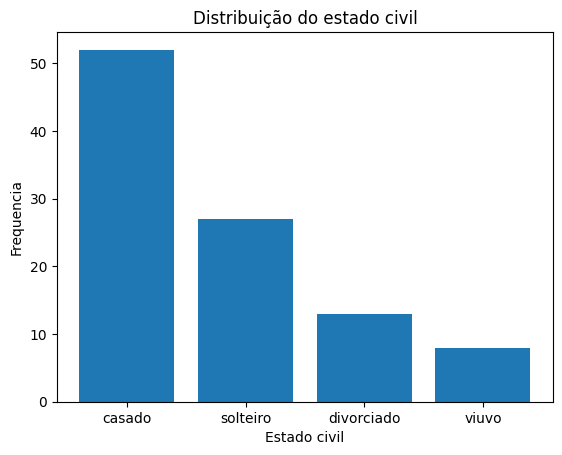

In [99]:
plt.title("Distribuição do estado civil")
plt.ylabel("Frequencia")
plt.xlabel("Estado civil")
plt.bar(x=ecivil.index, height=ecivil)

([<matplotlib.patches.Wedge at 0x1d11befce10>,
 [Text(-0.06906951669222933, 1.0978294047181931, 'noite'),
  Text(-0.49938972613520693, -0.9801070867158359, 'manha'),
  Text(0.9468162058102817, -0.5599455977280494, 'tarde')],
 [Text(-0.03767428183212509, 0.5988160389371961, '52.0%'),
  Text(-0.2723943960737492, -0.534603865481365, '31.0%'),
  Text(0.5164452031692445, -0.3054248714880269, '17.0%')])

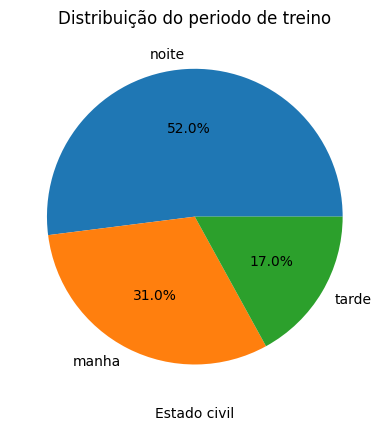

In [100]:
ptreino = df_sample["P.Treino"].value_counts()
plt.title("Distribuição do periodo de treino")
plt.xlabel("Estado civil")
plt.pie(ptreino,labels=ptreino.index,autopct='%1.1f%%')

In [101]:
fsemanal = df_sample["Freq.Sem"].value_counts().reset_index()
fsemanal.columns = ["Freq.Sem", "count"]  # Rename columns
fsemanal["percent"] = fsemanal["count"] / fsemanal["count"].sum() * 100
display(fsemanal)

,Freq.Sem,count,percent
0,3,32,32.0
1,2,24,24.0
2,4,20,20.0
3,5,13,13.0
4,1,6,6.0
5,6,5,5.0


Text(0.5, 0, 'Dias por semana')

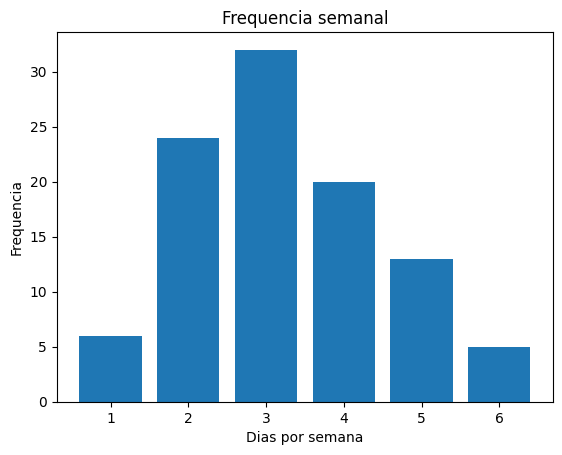

In [102]:
plt.bar(x=fsemanal["Freq.Sem"], height=fsemanal['count'])
plt.title("Frequencia semanal")
plt.ylabel("Frequencia")
plt.xlabel("Dias por semana")

In [103]:
inst = df_sample["Aval.Instal"].value_counts().reset_index()
inst.columns = ["Aval.Instal", "count"]  # Rename columns
inst["percent"] = inst["count"] / inst["count"].sum() * 100
display(inst)

,Aval.Instal,count,percent
0,A,47,47.0
1,Ar,32,32.0
2,r,21,21.0


Text(0.5, 0, 'Nota')

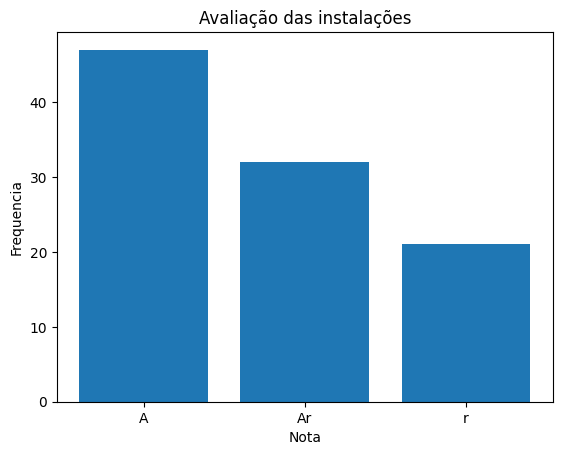

In [104]:
plt.bar(x=inst["Aval.Instal"], height=inst['count'])
plt.title("Avaliação das instalações")
plt.ylabel("Frequencia")
plt.xlabel("Nota")

In [105]:
cross_treino_civil = pd.crosstab(df_sample["P.Treino"],df_sample["E.Civil"])
display(cross_treino_civil)

E.Civil,casado,divorciado,solteiro,viuvo
P.Treino,,,,
manha,0,4,27,0
noite,52,0,0,0
tarde,0,9,0,8


In [106]:
pd.crosstab(df_sample["P.Treino"], df_sample["E.Civil"],normalize='all')

E.Civil,casado,divorciado,solteiro,viuvo
P.Treino,,,,
manha,0.00,0.04,0.27,0.00
noite,0.52,0.00,0.00,0.00
tarde,0.00,0.09,0.00,0.08


<Axes: xlabel='P.Treino', ylabel='Count'>

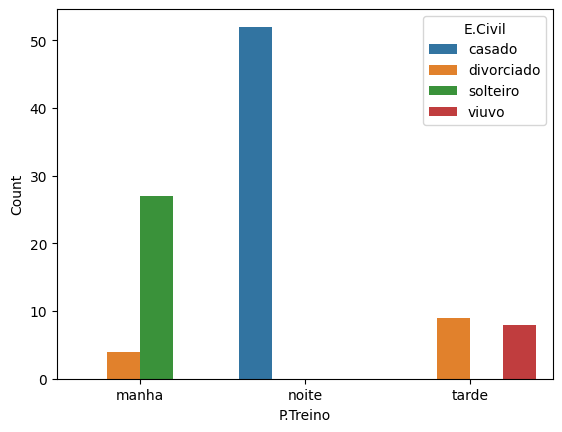

In [ ]:
tabela_long = cross_treino_civil.reset_index().melt(id_vars="P.Treino", var_name="E.Civil", value_name="Count")

sns.barplot(x="P.Treino", y="Count", hue="E.Civil", data=tabela_long)

<Axes: xlabel='Freq.Sem', ylabel='Count'>

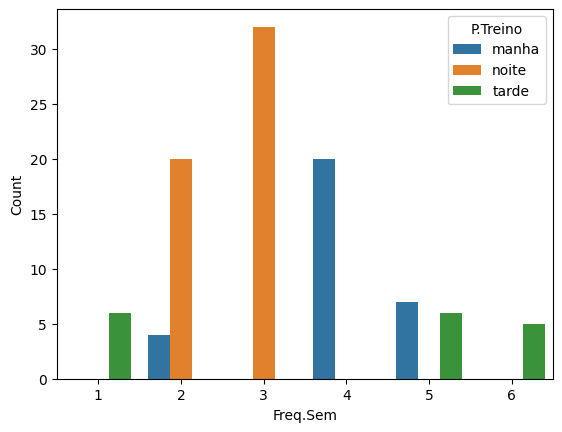

In [114]:
col2 = "P.Treino"
col1 = "Freq.Sem"
cross_troca_prof = pd.crosstab(df_sample[col1],df_sample[col2])
tabela_long = cross_troca_prof.reset_index().melt(id_vars=col1, var_name=col2, value_name="Count")
sns.barplot(x=col1, y="Count", hue=col2, data=tabela_long)

<Axes: xlabel='Aval.Prof', ylabel='Count'>

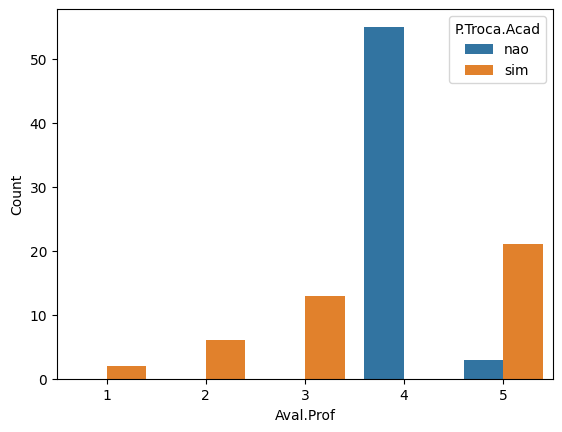

In [115]:
col2 = "P.Troca.Acad"
col1 = "Aval.Prof"
cross_troca_prof = pd.crosstab(df_sample[col1],df_sample[col2])
tabela_long = cross_troca_prof.reset_index().melt(id_vars=col1, var_name=col2, value_name="Count")
sns.barplot(x=col1, y="Count", hue=col2, data=tabela_long)

<Axes: xlabel='E.Civil', ylabel='Count'>

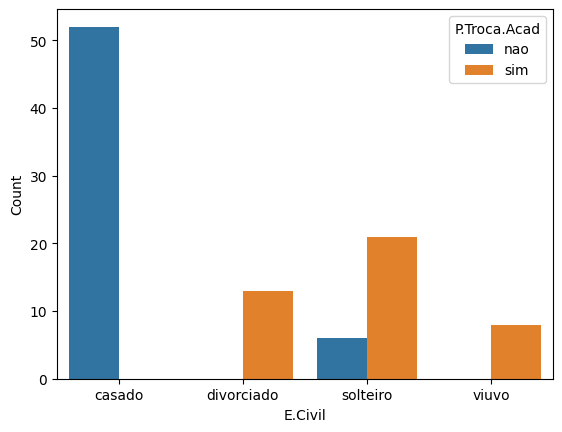

In [116]:
col2 = "P.Troca.Acad"
col1 = "E.Civil"
cross_troca_prof = pd.crosstab(df_sample[col1],df_sample[col2])
tabela_long = cross_troca_prof.reset_index().melt(id_vars=col1, var_name=col2, value_name="Count")
sns.barplot(x=col1, y="Count", hue=col2, data=tabela_long)

<Axes: xlabel='P.Treino', ylabel='Count'>

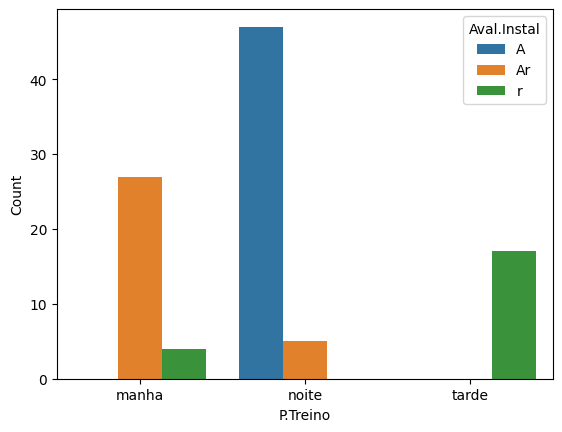

In [117]:
col2 = "Aval.Instal"
col1 = "P.Treino"
cross_troca_prof = pd.crosstab(df_sample[col1],df_sample[col2])
tabela_long = cross_troca_prof.reset_index().melt(id_vars=col1, var_name=col2, value_name="Count")
sns.barplot(x=col1, y="Count", hue=col2, data=tabela_long)

<Axes: xlabel='Freq.Sem', ylabel='Count'>

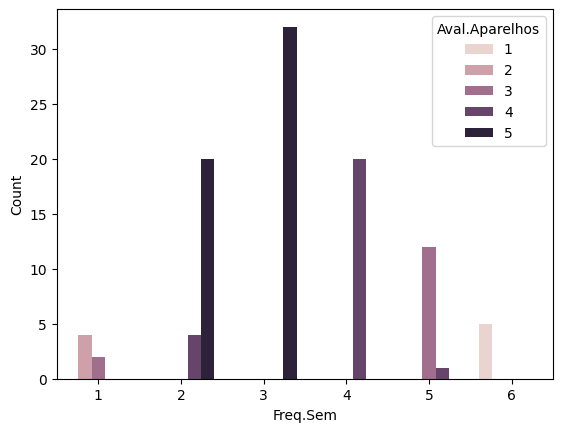

In [ ]:
col2 = "Aval.Aparelhos"
col1 = "Freq.Sem"
cross_troca_prof = pd.crosstab(df_sample[col1],df_sample[col2])
tabela_long = cross_troca_prof.reset_index().melt(id_vars=col1, var_name=col2, value_name="Count")
sns.barplot(x=col1, y="Count", hue=col2, data=tabela_long)